# **CS M148 Project Check-In 3**

## Step 1. Chosen Binary Categorical Response Variable to Model for Logistic Regression:

Our binary categorical response variable is Extracurricular_Activities (yes/no -- does the student participate in extracurricular activities or not?)

****

## Step 2. Single Variable or Variables we are using as Predictors:

Our predictor variable is Family_Income (Low/Medium/High). This makes sense as a predictor since one would assume that students with a higher family income are more likely to afford participation in extracurricular activities. Another possible predictor is Parental_Involvement (whether the parents' involvement in their children's education is Low/Medium/High) since one would assume that students with parents who are more involved in their education would be more likely to participate in extracurricular activities. However, including both Family_Income and Parental_Involvement as predictors could lead to overfitting since the two might be collinear (as a higher family income could be associated with a higher level of parental involvement). However, having Family_Income as the only predictor can lead to other issues since it is a categorical variable with only 3 categories. Thus, we can use Attendance, a continuous variable, as another predictor.

****

## Step 3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

In [ ]:
# Using the URL for the file
url = 'https://raw.githubusercontent.com/gengon7/CSM148-Data/refs/heads/main/StudentPerformanceFactors.csv'

# Read the CSV file from the URL
student_performance_factors = pd.read_csv(url)

student_performance_factors.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#### Data Preprocessing

In [ ]:
# Drop rows with missing values
student_performance_cleaned = student_performance_factors.dropna()

# encoding categorical variables
# converting Extracurricular_Activities and Family_Income columns to numerical values
student_performance_cleaned['Family_Income'] = student_performance_cleaned['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
student_performance_cleaned['Extracurricular_Activities'] = student_performance_cleaned['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})

X = student_performance_cleaned[['Family_Income', 'Attendance']]
y = student_performance_cleaned['Extracurricular_Activities']

X.head()

,Family_Income,Attendance
0,0,84
1,1,64
2,1,98
3,1,89
4,1,92


In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Logistic Regression

In [ ]:
# Initialize the logistic regression model
# adding class_weight='balanced' to help with class imbalance
model = LogisticRegression(solver='liblinear', class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [ ]:
# Predict the probabilities for the test set
y_prob = model.predict_proba(X_test)

# Show the predicted probabilities for the first five examples
print("Predicted probabilities for the first 5 examples:\n", y_prob[:5])

Predicted probabilities for the first 5 examples:
 [[0.50162249 0.49837751]
 [0.5027197  0.4972803 ]
 [0.4966021  0.5033979 ]
 [0.50773955 0.49226045]
 [0.49389903 0.50610097]]


In [ ]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# check the predictions
print(f"y_pred: {y_pred[:5]}")
print(f"y_test: {y_test.values[:5]}")

y_pred: [0 0 1 0 1]
y_test: [1 1 1 1 1]


#### Confusion Matrix

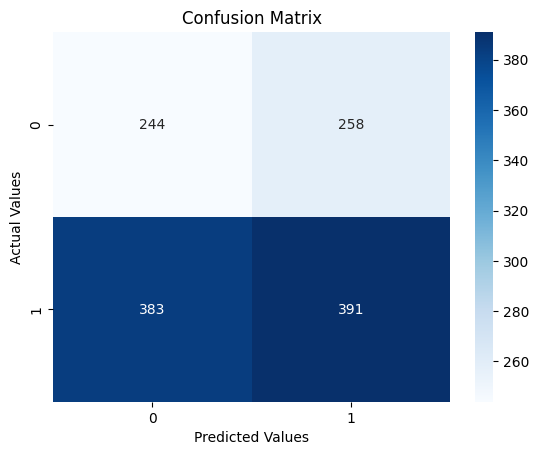

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

#### Prediction Accuracy and Prediction Error

In [ ]:
# Compute the prediction accuracy from the confusion matrix
prediction_accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"Prediction Accuracy: {prediction_accuracy * 100:.2f}%")

Prediction Accuracy: 49.76%


#### True Positive and True Negative Rate

In [ ]:
# True positive rate computed from the confusion matrix:
true_positive_rate = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(f"True Positive Rate: {true_positive_rate * 100:.2f}%")

True Positive Rate: 50.52%


In [ ]:
# The true negatvie rate can also be computed from the confusion matrix:
true_negative_rate = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print(f"True Negative Rate: {true_negative_rate * 100:.2f}%")

True Negative Rate: 48.61%


****

## Step 4.

#### Calculate and Plot ROC Curve (validation data set)

In [ ]:
# compute the ROC curve variables
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

In [ ]:
thresholds

array([       inf, 0.51227781, 0.51189185, 0.51150587, 0.51111988,
       0.51073388, 0.51034786, 0.50996183, 0.50957579, 0.50918974,
       0.50880368, 0.5084176 , 0.50803152, 0.50764543, 0.50725932,
       0.50687321, 0.50654842, 0.50648709, 0.50616229, 0.50610097,
       0.50577616, 0.50571483, 0.50539002, 0.50532869, 0.50500387,
       0.50494254, 0.50461772, 0.50455639, 0.50423156, 0.50417023,
       0.5038454 , 0.50345923, 0.5033979 , 0.50307306, 0.50301173,
       0.50268689, 0.50262555, 0.50230071, 0.50223937, 0.50191453,
       0.50185319, 0.50152834, 0.50146701, 0.50114216, 0.50108082,
       0.50081731, 0.50075597, 0.50069463, 0.50043112, 0.50036978,
       0.50030844, 0.50004493, 0.49998359, 0.49992226, 0.49965874,
       0.49959741, 0.49953607, 0.49927256, 0.49921122, 0.49914988,
       0.49888637, 0.49882503, 0.49876369, 0.49850018, 0.49843885,
       0.49837751, 0.498114  , 0.49805266, 0.49799133, 0.49772782,
       0.49766648, 0.49760515, 0.49734164, 0.4972803 , 0.49721

In [ ]:
roc_model = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Model': 'Logistic Regression'
    }, index = thresholds)

roc_sample_df = pd.concat([roc_model])

px.line(
    roc_sample_df,
    x='False Positive Rate',
    y='True Positive Rate',
    title='ROC Curve',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    color='Model',
    width = 700, height = 500
)

In [ ]:
# Compute the AUC of each plot
auc = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC: {auc * 100:.2f}%")

AUC: 48.41%


#### AUC (validation data set)

#### Use 5-fold Cross-Validation on the Validation Set to Calculate the AUC and Accuracy of Each Fold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Use 5-fold cross-validation to calculate the AUC and accuracy of each fold
cross_val_score(model, X, y, cv=5, scoring='roc_auc')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

i = 1
for train_index, test_index in skf.split(X, y):
    clone_model = clone(model)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(test_index)
    clone_model.fit(X_train, y_train)
    y_pred = clone_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    auc = roc_auc_score(y_test, clone_model.predict_proba(X_test)[:, 1])
    print(f"Fold {i}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"AUC: {auc * 100:.2f}%")
    i += 1

[  10   11   18 ... 6356 6359 6365]
Fold 1:
Accuracy: 50.63%
AUC: 48.72%
[   2    5    7 ... 6374 6375 6376]
Fold 2:
Accuracy: 50.00%
AUC: 50.29%
[   0   13   14 ... 6370 6372 6373]
Fold 3:
Accuracy: 49.61%
AUC: 47.79%
[   6   15   17 ... 6354 6367 6368]
Fold 4:
Accuracy: 47.22%
AUC: 47.14%
[   1    3    4 ... 6360 6364 6377]
Fold 5:
Accuracy: 50.59%
AUC: 50.25%


****

## Step 5. How did you choose a threshold for positive predictions?

In [ ]:
print(roc_sample_df.sample)

<bound method NDFrame.sample of           False Positive Rate  True Positive Rate                Model
inf                  0.000000            0.000000  Logistic Regression
0.512278             0.007968            0.009044  Logistic Regression
0.511892             0.013944            0.011628  Logistic Regression
0.511506             0.025896            0.014212  Logistic Regression
0.511120             0.035857            0.029716  Logistic Regression
...                       ...                 ...                  ...
0.487303             0.982072            0.976744  Logistic Regression
0.486918             0.982072            0.983204  Logistic Regression
0.486532             0.990040            0.988372  Logistic Regression
0.485760             0.998008            0.998708  Logistic Regression
0.485374             1.000000            1.000000  Logistic Regression

[122 rows x 3 columns]>


When choosing a threshold, we would ideally like a threshold which has a low false positive rate and high true positive rate. However, looking at our ROC curve, we see that every single threshold tested produces a result where TPR essentially equal to FPR. Therefore, all of the thresholds are equally as bad as each other. This is reflected in our cross validation, where the AUC and accuracy stay around 50%, indicating our model is not making any meaningful predictions.

If we had to choose a threshold, we would choose 0.5, since it gives an FPR and TPR of around 50%, which avoids extremes on either end of the spectrum. However, as stated previously, this is still not good.
